# Dr.Sammelweis and Effect of Hand-washing (and Chlorine)

## In 1800's child birth meant nearly death of 10% of the mothers from fever

In [ ]:
#EDA

In [104]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
#read files

In [15]:
df_year = pd.read_csv('/Users/akoksoy/Downloads/DrSem/annual_deaths_by_clinic.csv')

In [16]:
df_month = pd.read_csv('/Users/akoksoy/Downloads/DrSem/monthly_deaths.csv', 
                      parse_dates=['date'])

In [18]:
df_year.shape

(12, 4)

In [19]:
df_month.shape

(98, 3)

In [21]:
df_year.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [22]:
df_month.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [23]:
df_year.year

0     1841
1     1842
2     1843
3     1844
4     1845
5     1846
6     1841
7     1842
8     1843
9     1844
10    1845
11    1846
Name: year, dtype: int64

In [25]:
df_year.isna().any()

year      False
births    False
deaths    False
clinic    False
dtype: bool

In [26]:
df_month.isna().any()

date      False
births    False
deaths    False
dtype: bool

In [27]:
df_year.deaths.mean()

223.33333333333334

In [29]:
df_month.deaths.mean()

22.46938775510204

In [30]:
df_month.births.mean()

267.0

In [31]:
df_year.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [32]:
df_year.describe()

year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

In [33]:
df_month.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

In [39]:
a= df_year.deaths.sum()
a

2680

In [40]:
b =df_year.births.sum()
b

37833

In [44]:
#percent death rate

PDR= a/b*100
PDR
print(f'percent death rate is: {PDR:.3}%')

percent death rate is: 7.08%


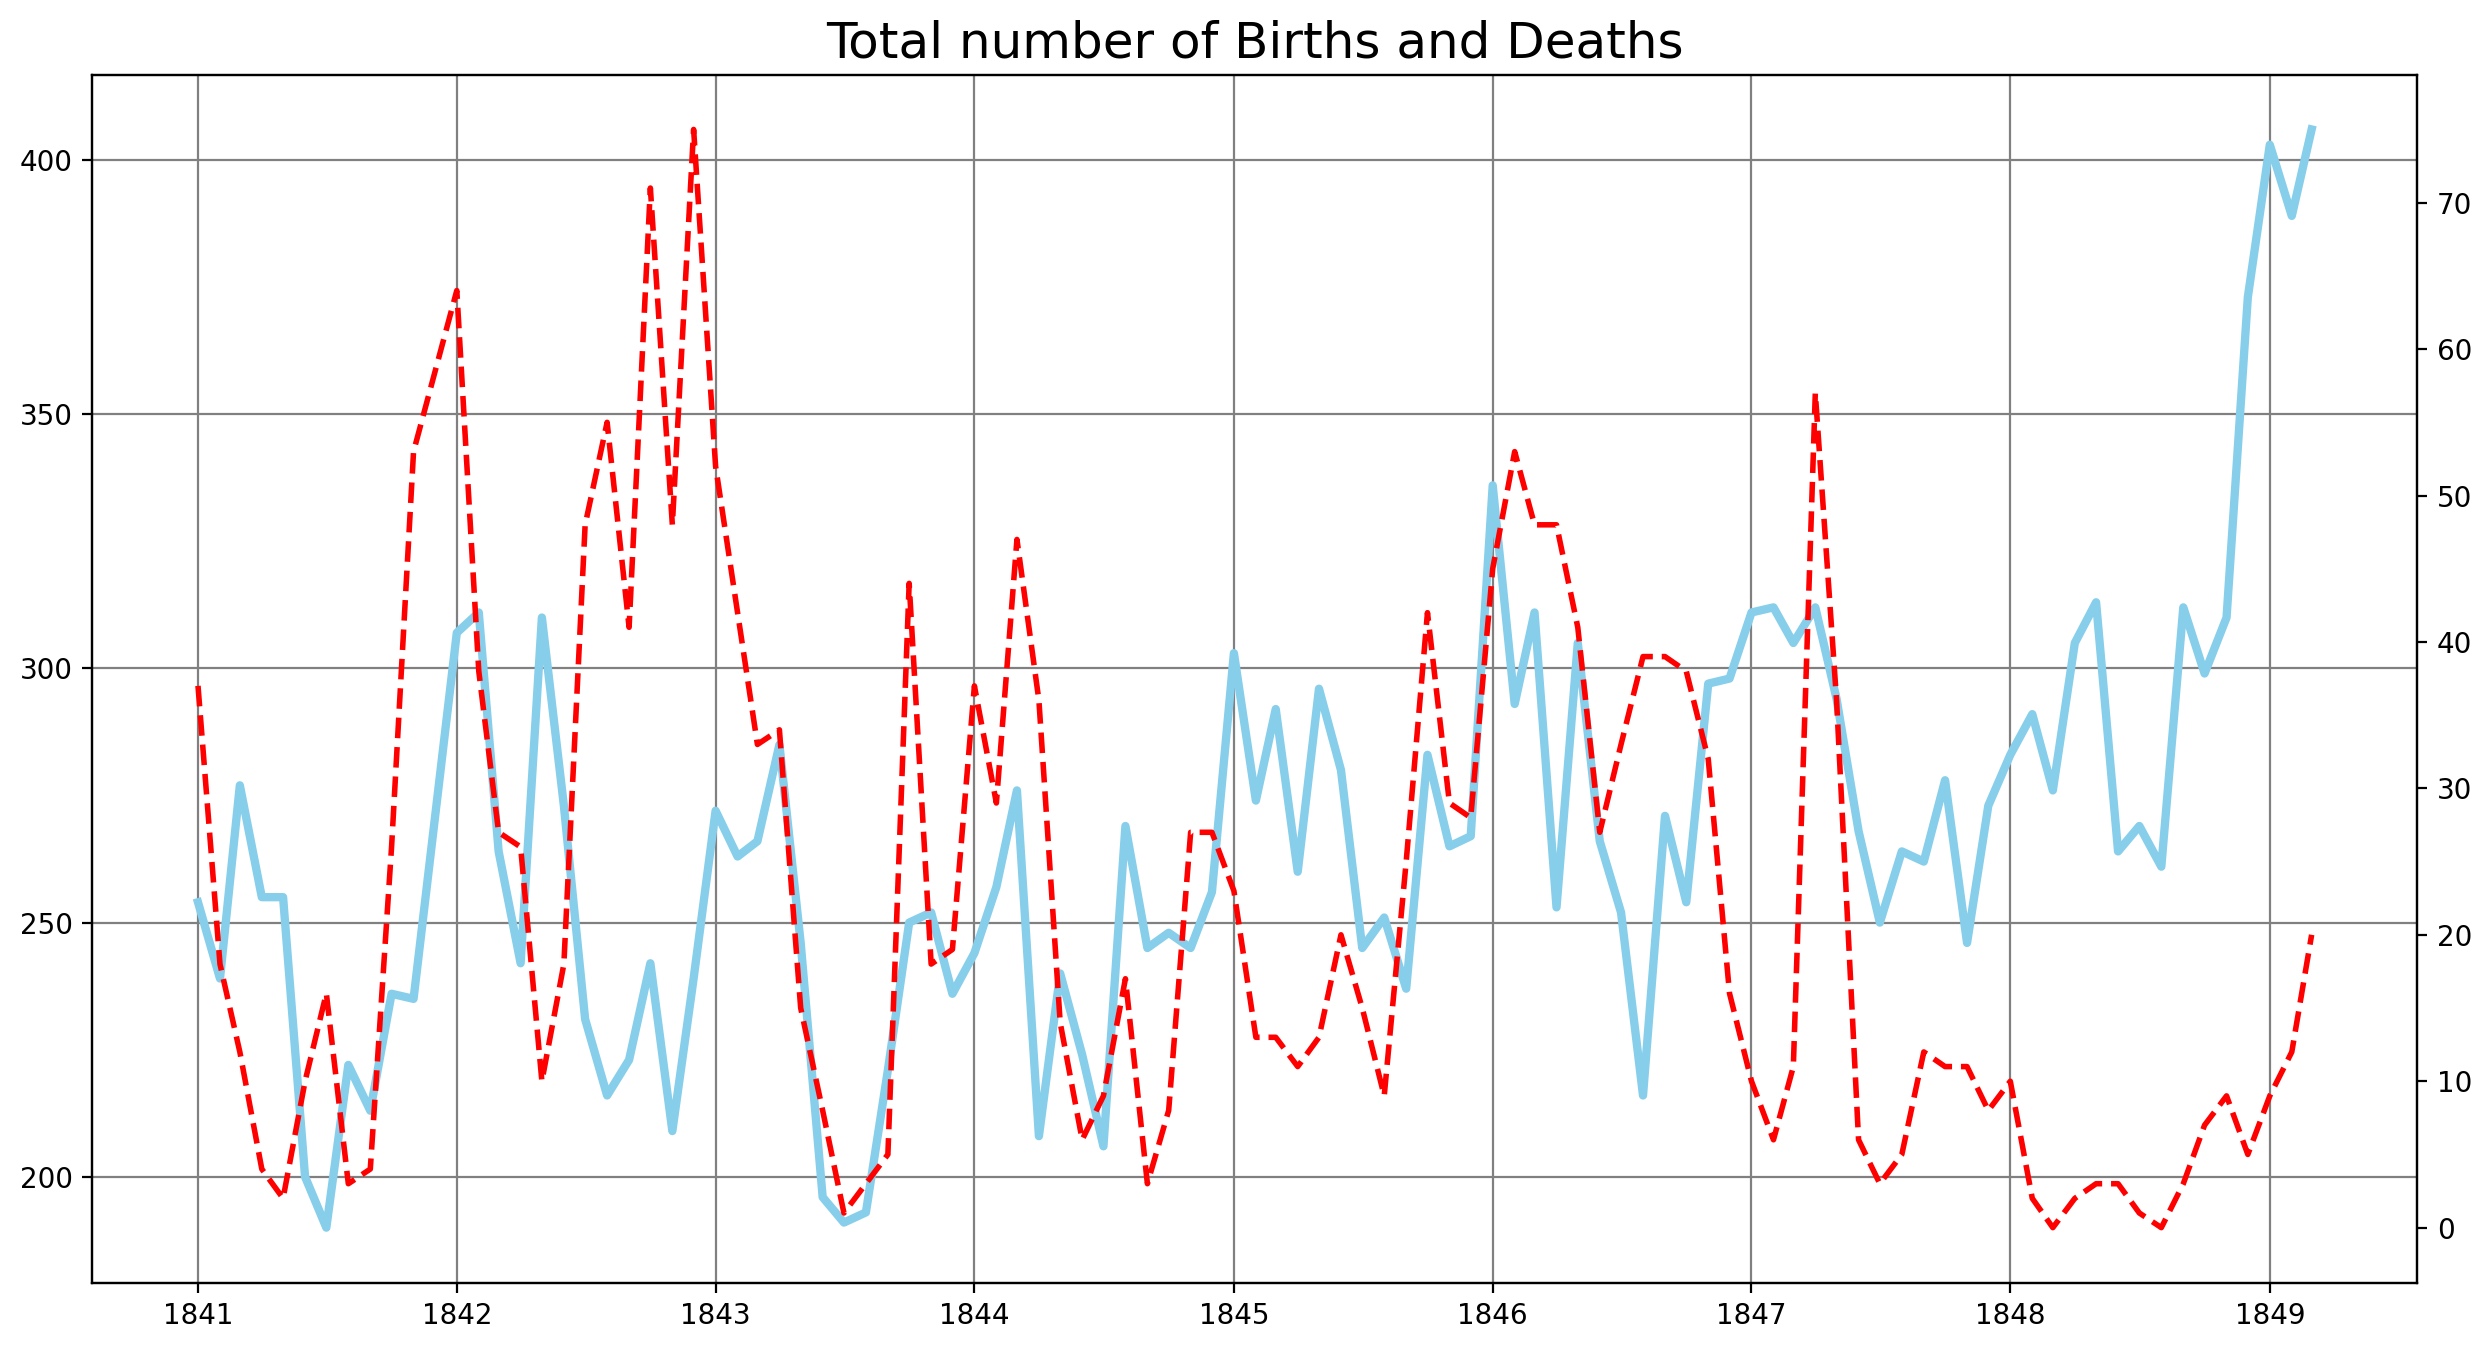

In [47]:
# Mortality figure

plt.figure(figsize = (15,8), dpi=200)

plt.title('Total number of Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color = 'gray', linestyle = '-')

ax1.plot(df_month.date, 
        df_month.births,
        color='skyblue', 
        linewidth = 3)

ax2.plot(df_month.date,
        df_month.deaths,
        color='red',
        linewidth=2,
        linestyle='--')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
plt.show()

In [49]:
# There were two maternity wards at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.
# Data split by clinic

df_year.groupby('clinic').births.sum()

clinic
clinic 1    20042
clinic 2    17791
Name: births, dtype: int64

In [52]:
line = px.line(df_year,
              x='year',
              y='births', 
              color ='clinic',
              title='Total Yearly Births by Clinic')
line.show()

In [87]:
line2 = px.line(df_year,
              x='year',
              y='deaths', 
              color ='clinic',
              title='Total Yearly Deaths by Clinic')
line2.show()

In [57]:
df_year['pct_deaths']=df_year['deaths']/df_year['births']*100

In [58]:
df_year.head()

year  births  deaths    clinic  pct_deaths
0  1841    3036     237  clinic 1        7.81
1  1842    3287     518  clinic 1       15.76
2  1843    3060     274  clinic 1        8.95
3  1844    3157     260  clinic 1        8.24
4  1845    3492     241  clinic 1        6.90

In [60]:
pct = px.line(df_year,
             x='year',
             y='pct_deaths',
             color = 'clinic',
             title = 'Percentage of Death by Clinic')
pct.show()

In [93]:
df_month['pct_deaths']=df_month['deaths']/df_month['births']*100

# Effect of Hand washing and cleaning with Chlorine
## In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments;
## not just with soap and water but with a chlorine solution 
## This was to get rid of any smell on doctors' hands after an autopsy.
# Luckily chlorine is a great disinfectant.

In [94]:
df_month.date[0]

Timestamp('1841-01-01 00:00:00')

In [96]:
df_month['pct_deaths']=df_month['deaths']/df_month['births']*100

In [97]:
clean_start = pd.to_datetime('1847-06-01')

In [98]:
before = df_month[df_month.date < clean_start]
after = df_month[df_month.date >= clean_start]

In [99]:
rate_before = before.deaths.sum()/before.births.sum()*100
print(f'Death rate before 1847 cleaning is {rate_before:.5}%')

Death rate before 1847 cleaning is 10.526%


In [100]:
rate_after = after.deaths.sum()/after.births.sum()*100
print(f'Death rate after 1847 cleaning is {rate_after:.5}%')

Death rate after 1847 cleaning is 2.1531%


In [101]:
#Rolling average of Death rate

In [108]:
roll_df = before.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [109]:
roll_df

births  deaths  pct_death  pct_deaths
date                                             
1841-01-01     nan     nan        nan         nan
1841-02-01     nan     nan        nan         nan
1841-03-01     nan     nan        nan         nan
1841-04-01     nan     nan        nan         nan
1841-05-01     nan     nan        nan         nan
...            ...     ...        ...         ...
1847-01-01  274.50   29.00      11.13       11.13
1847-02-01  290.50   23.50       8.44        8.44
1847-03-01  296.17   18.83       6.64        6.64
1847-04-01  305.83   22.00       7.19        7.19
1847-05-01  305.33   22.67       7.44        7.44

[76 rows x 4 columns]

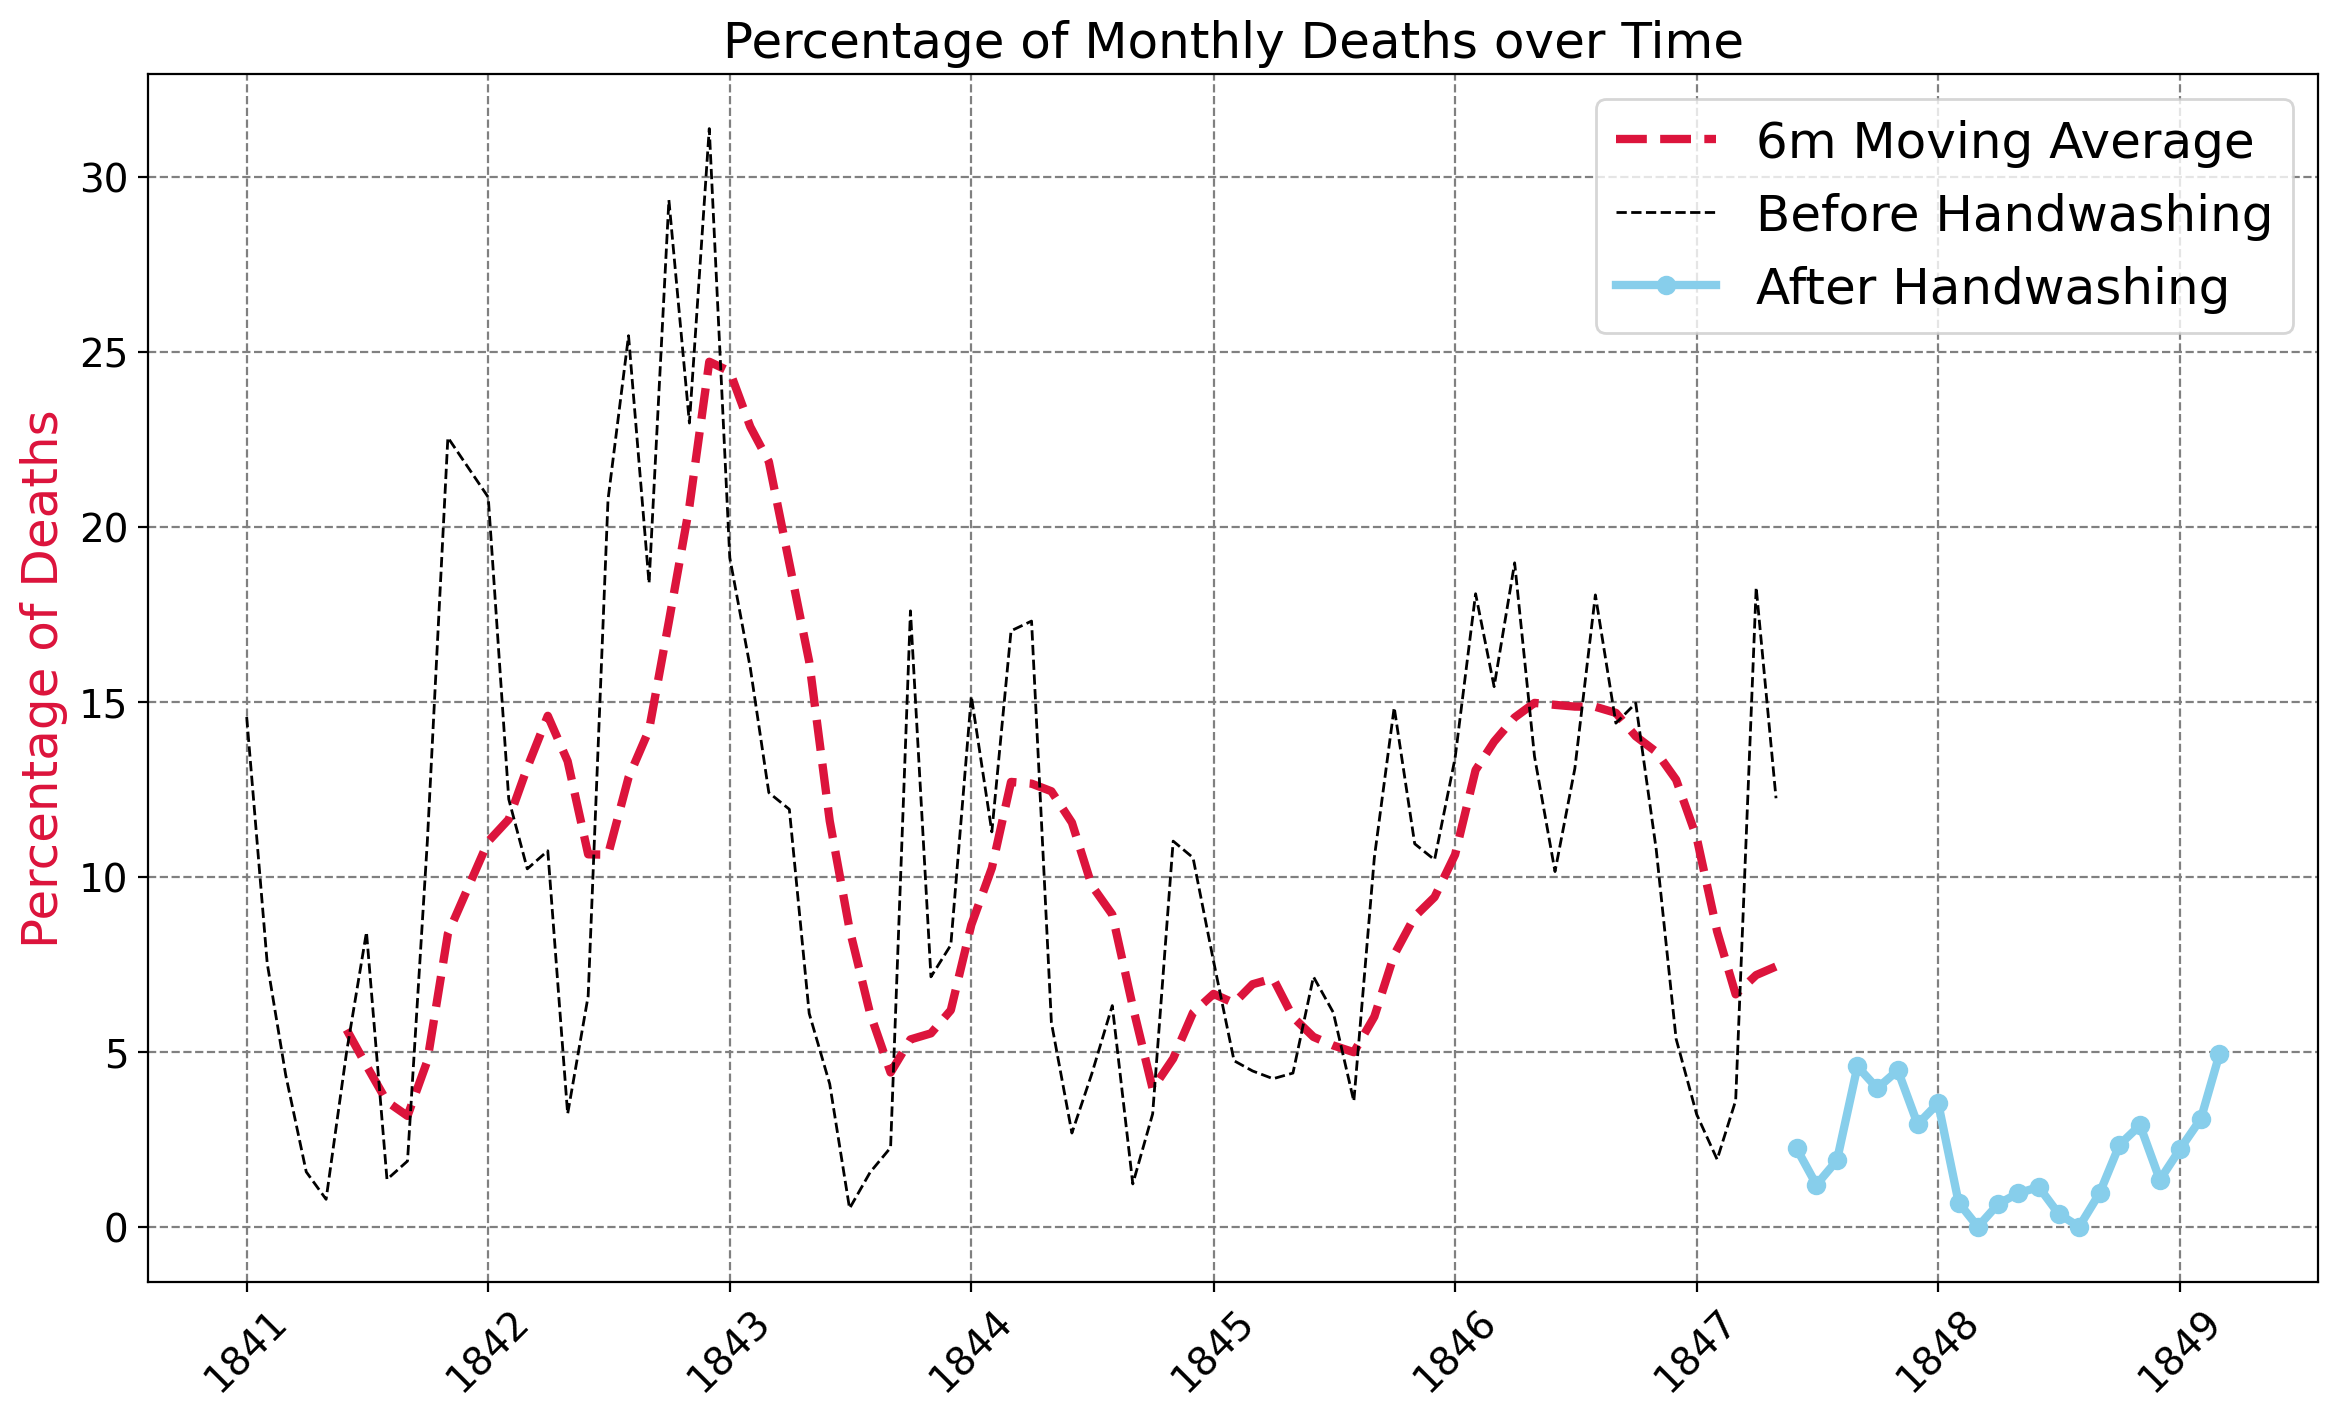

In [110]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(years_fmt)
# ax.xaxis.set_minor_locator(months)
# ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_death, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before.date, 
                    before.pct_death,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after.date, 
                    after.pct_death, 
                    color='skyblue',
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

In [111]:
df_month['washing_hands'] = np.where(df_month.date < clean_start, 'No', 'Yes')

In [113]:
box = px.box(df_month, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How the Stats Changed with Handwashing')

box.update_layout(xaxis_title='Washing Hands',
                  yaxis_title='Percentage of Monthly Deaths',)

box.show()

In [114]:
import seaborn as sns

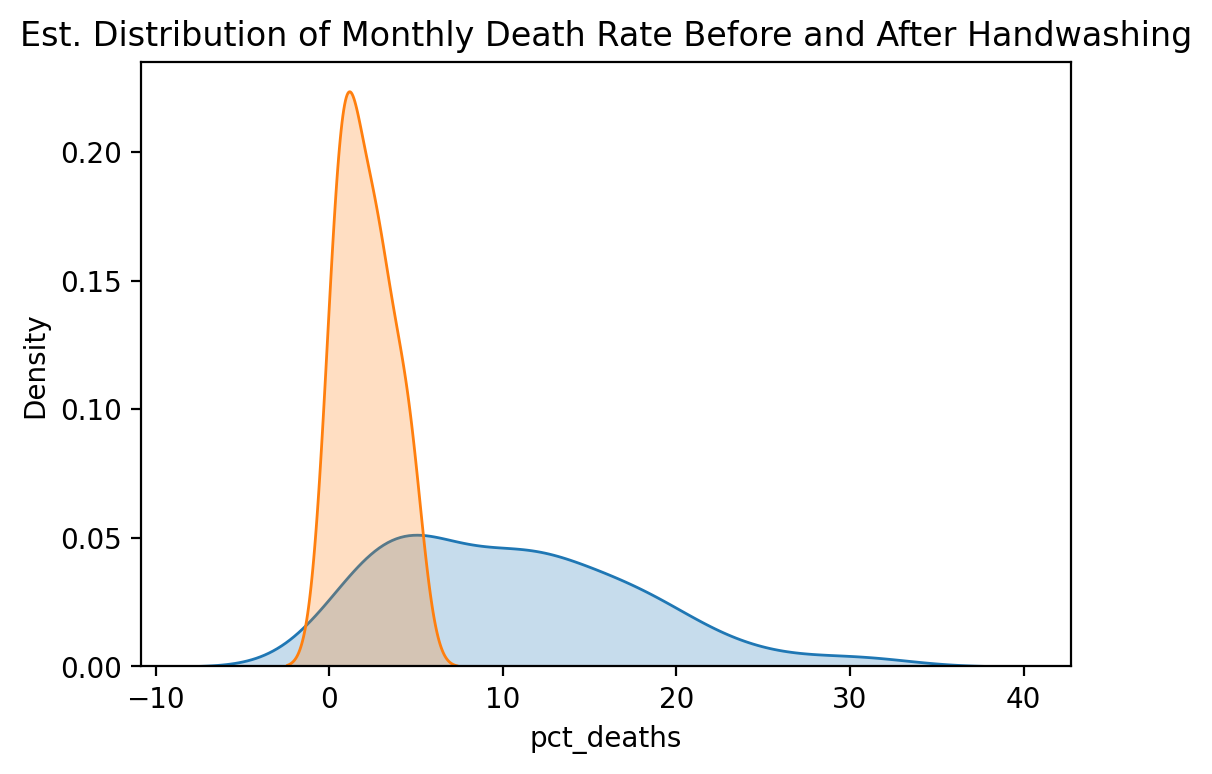

In [115]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before.pct_deaths, shade=True)
sns.kdeplot(after.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

In [117]:
t_stat, p_value = stats.ttest_ind(a=before.pct_deaths, 
                                  b=after.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512
